# An example of using EASYMORE with source netCDF files in regular Latitude and Longitude
## Remapping of ERA5 to subbasins of South Saskatchewan River at Medicine Hat, Alberta, Canada.

In [1]:
# loading candex
from candex.candex import candex

# initializing candex object
cndx = candex()

# specifying candex objects
# name of the case; the temporary, remapping and remapped file names include case name
cndx.case_name                = 'ERA5_Medicine_Hat'              
# temporary path that the candex generated GIS files and remapped file will be saved
cndx.temp_dir                 = '../temporary/'
# name of target shapefile that the source netcdf files should be remapped to
cndx.target_shp                = '../data/target_shapefiles/South_Saskatchewan_MedicineHat.shp'
# name of netCDF file(s); multiple files can be specified with *
cndx.source_nc                = '../data/Source_nc_ERA5/ERA5_NA_*.nc'
# name of variables from source netCDF file(s) to be remapped
cndx.var_names                = ['airtemp','pptrate']
# rename the variables from source netCDF file(s) in the remapped files;
# it will be the same as source if not provided
cndx.var_names_remapped       = ['temperature','precipitation']
# name of variable longitude in source netCDF files
cndx.var_lon                  = 'longitude'
# name of variable latitude in source netCDF files
cndx.var_lat                  = 'latitude'
# name of variable time in source netCDF file; should be always time
cndx.var_time                 = 'time'
# location where the remapped netCDF file will be saved
cndx.output_dir               = '../output/'
# format of the variables to be saved in remapped files,
# if one format provided it will be expanded to other variables
cndx.format_list              = ['f4']
# fill values of the variables to be saved in remapped files,
# if one value provided it will be expanded to other variables
cndx.fill_value_list          = ['-9999.00']
# if required that the remapped values to be saved as csv as well
cndx.save_csv                 = True
# if uncommented candex will use this and skip GIS tasks
# cndx.remap_csv                = '../temporary/ERA5_Medicine_Hat_remapping.csv'

# execute candex
cndx.run_candex()


no author name is provide and the author name is changed to (author name)!
EASYMORE is given multiple varibales to be remapped but only on format and fill valueEASYMORE repeat the format and fill value for all the variables in output files
EASYMORE will remap variable  airtemp  from source file to variable  temperature  in remapped NeCDF file
EASYMORE will remap variable  pptrate  from source file to variable  precipitation  in remapped NeCDF file
EASYMORE detects that target shapefile is in WGS84 (epsg:4326)
EASYMORE detects that no field for ID is provided in sink/target shapefile
arbitarary values of ID are added in the field ID_t
EASYMORE detects that either of the fields for latitude or longitude is not provided in sink/target shapefile
calculating centroid of shapes in equal area projection
point shapefile for centroid of the shapes is saves here:
../temporary/ERA5_Medicine_Hat_centroid.shp
EASYMORE detects that no field for latitude is provided in sink/target shapefile
latitude 

/Users/shg096/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/candex/candex.py:113: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_2 ['lat_temp'] = shp_2.centroid.y
/Users/shg096/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/candex/candex.py:114: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_2 ['lon_temp'] = shp_2.centroid.x
/Users/shg096/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/candex/candex.py:1259: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  pairs = gpd.GeoDataFrame(nei, columns=['idx1','idx2'], crs=df1.crs)
/Users/shg096/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/candex/candex

------REMAPPING------
Remapping ../data/Source_nc_ERA5/ERA5_NA_19790101.nc to ../output/ERA5_Medicine_Hat_remapped_1979-01-01-00-00-00.nc
Started at date and time 2021-04-13 19:31:29.514570
Ended   at date and time 2021-04-13 19:31:29.801347
------
Converting variable temperature from remapped file of ../output/ERA5_Medicine_Hat_remapped_1979-01-01-00-00-00.nc to ../output/ERA5_Medicine_Hat_remapped_temperature_1979-01-01-00-00-00.csv
Converting variable precipitation from remapped file of ../output/ERA5_Medicine_Hat_remapped_1979-01-01-00-00-00.nc to ../output/ERA5_Medicine_Hat_remapped_precipitation_1979-01-01-00-00-00.csv
------
Remapping ../data/Source_nc_ERA5/ERA5_NA_19790102.nc to ../output/ERA5_Medicine_Hat_remapped_1979-01-02-00-00-00.nc
Started at date and time 2021-04-13 19:31:29.871305
Ended   at date and time 2021-04-13 19:31:30.098727
------
Converting variable temperature from remapped file of ../output/ERA5_Medicine_Hat_remapped_1979-01-02-00-00-00.nc to ../output/ERA5_M

--------------
--------------
# Visualization of the source and the results

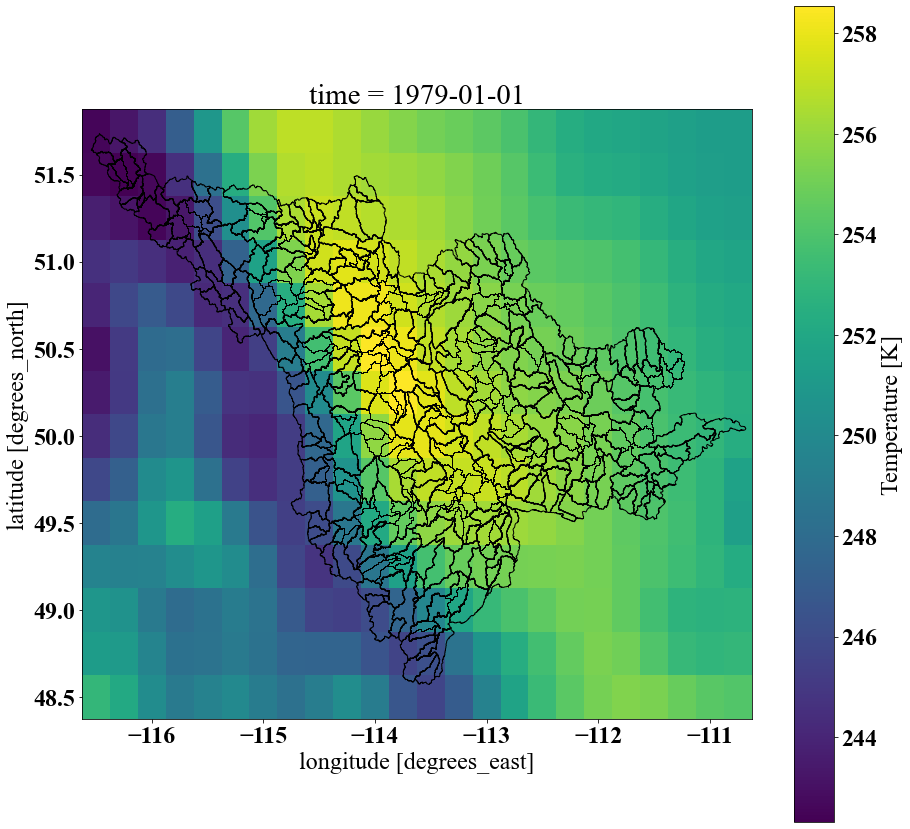

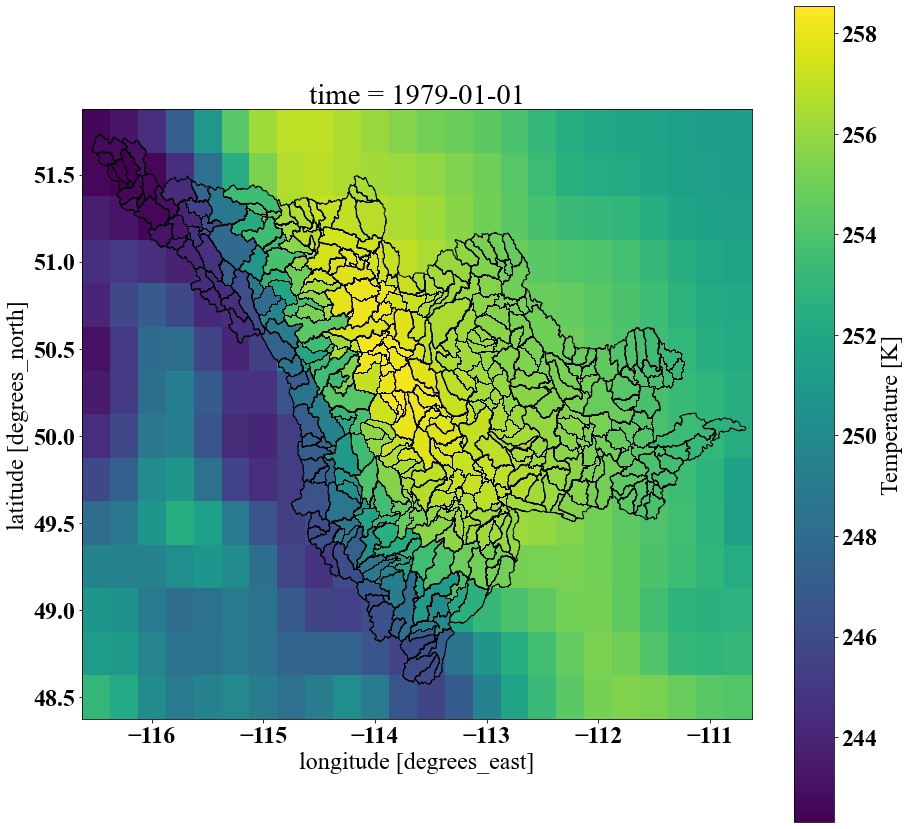

In [2]:
# visualize the result
import geopandas as gpd
import xarray as xr
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)

# visualize the original netCDF for the first file, first time step
shp_target = gpd.read_file(cndx.target_shp) # load the target shapefile
# load the first source netcdf file
nc_name = sorted(glob.glob(cndx.source_nc))
ds_source = xr.open_dataset(nc_name[0])
# subset the region of interest:
lat_lim = np.array([ 48.2 , 51.7 ]) # limit for lat
lon_lim = np.array([ -116.5 , -110.5 ]) # limit for lon
lats = np.array(ds_source.variables[cndx.var_lat][:] )
lons = np.array(ds_source.variables[cndx.var_lon][:])
lat_low = np.argmin( np.abs( lats - lat_lim[0] ) )
lat_up = np.argmin( np.abs( lats - lat_lim[1] ) )
lon_low = np.argmin( np.abs( lons - lon_lim[0] ) )
lon_up = np.argmin( np.abs( lons - lon_lim[1] ) )
if lat_up < lat_low:
    temp = lat_low
    lat_low = lat_up
    lat_up = temp
if lon_up < lon_low:
    temp = lon_low
    lon_low = lon_up
    lon_up = temp
ds_source = ds_source.isel(latitude=np.arange(lat_low,lat_up))
ds_source = ds_source.isel(longitude=np.arange(lon_low,lon_up))
# plotting
f, axes = plt.subplots(1,1,figsize=(15,15))
ds_source.airtemp[0,:,:].plot( ax = axes)
shp_target.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 1, ax = axes)
plt.savefig('../fig/Example1_A.png')

# visualize the remapped netCDF for the first file, first time step
# target nc file
nc_names = sorted(glob.glob (cndx.output_dir + cndx.case_name + '*.nc'))
ds       = xr.open_dataset(nc_names[0]) # the first netcdf file
values   = ds.temperature [0,:] # the first time frame of the first 
IDs      = ds.ID [:] # get the ID
# create a data frame for the model simulation
df = pd.DataFrame()
df ['value'] = values
df ['ID_t']    = IDs  # .astype(int)
df = df.sort_values (by = 'ID_t')
# load the shape file target that is generated by candex (with consistent IDs)
shp_target = gpd.read_file(cndx.temp_dir+ cndx.case_name + '_target_shapefile.shp') # load the target shapefile
shp_target ['ID_t'] = shp_target ['ID_t'].astype(float)
shp_target = shp_target.sort_values(by='ID_t')# sort on values
shp_target = pd.merge_asof(shp_target, df, on='ID_t', direction='nearest')
shp_target = shp_target.set_geometry('geometry') #bring back the geometry filed; pd to gpd
# plotting
f, axes = plt.subplots(1,1,figsize=(15,15))
ds_source.airtemp[0,:,:].plot( ax = axes)
ds_source.airtemp[0,:,:].plot( ax = axes, alpha = 1, add_colorbar=False)
shp_target.plot(column= 'value', edgecolor='k',linewidth = 1, ax = axes )#, legend=True)
plt.savefig('../fig/Example1_B.png')
